In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
import os
import matplotlib.pyplot as plt
from datetime import date

In [2]:
# Define assets and date ranges
tickers = ['AAPL', 'GOOGL', 'TSLA', 'BND', 'BTC-USD']
start_date = '2015-01-01'
end_date = date.today()
train_end = '2020-12-31'
val_end = '2022-06-30'

In [3]:
data = yf.download(tickers, start=start_date, end=end_date)
data = data.stack(level=1, future_stack=True).rename_axis(['Date', 'Ticker']).reset_index()
data
s = data.loc[data["Ticker"] == "BTC-USD"].dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


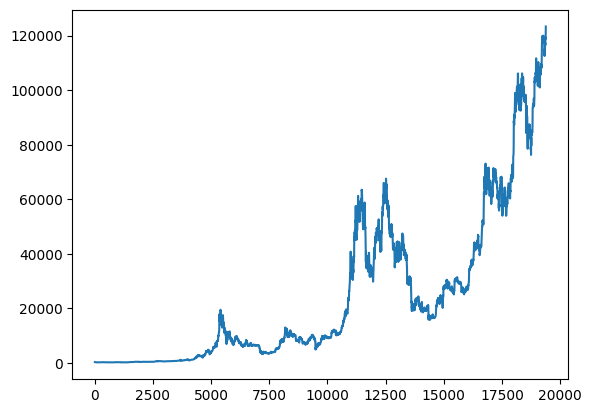

In [4]:
plt.plot(s["Close"])

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data = data.sort_values(["ticker", "date"])
data[["close", "high", "low", "open", "volume"]] = data.groupby("ticker")[["close", "high", "low", "open", "volume"]].ffill()
data

Price,date,ticker,close,high,low,open,volume
0,2015-01-01,AAPL,NaN,NaN,NaN,NaN,NaN
5,2015-01-02,AAPL,24.261042,24.729265,23.821666,24.718169,212818400.0
10,2015-01-03,AAPL,24.261042,24.729265,23.821666,24.718169,212818400.0
15,2015-01-04,AAPL,24.261042,24.729265,23.821666,24.718169,212818400.0
20,2015-01-05,AAPL,23.577572,24.110148,23.391171,24.030261,257142000.0
...,...,...,...,...,...,...,...
19369,2025-08-09,TSLA,329.649994,335.149994,320.980011,321.429993,91200300.0
19374,2025-08-10,TSLA,329.649994,335.149994,320.980011,321.429993,91200300.0
19379,2025-08-11,TSLA,339.029999,346.640015,334.149994,335.000000,105320200.0
19384,2025-08-12,TSLA,340.839996,345.260010,332.940002,345.000000,80522100.0


In [ ]:
# Compute daily returns (in decimal form, e.g., 0.01 for 1%)
data['returns'] = data.groupby('ticker')['close'].pct_change()
data = data.dropna()
data

/var/folders/mp/4wh54f210fs0z9blnbg386280000gn/T/ipykernel_94935/3658863848.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['returns'] = data.groupby('ticker')['close'].pct_change()


Price,date,ticker,close,high,low,open,volume,returns
10,2015-01-03,AAPL,24.261042,24.729265,23.821666,24.718169,212818400.0,0.000000
15,2015-01-04,AAPL,24.261042,24.729265,23.821666,24.718169,212818400.0,0.000000
20,2015-01-05,AAPL,23.577572,24.110148,23.391171,24.030261,257142000.0,-0.028171
25,2015-01-06,AAPL,23.579792,23.839422,23.218083,23.641926,263188400.0,0.000094
30,2015-01-07,AAPL,23.910435,24.010292,23.677432,23.788385,160423600.0,0.014022
...,...,...,...,...,...,...,...,...
19369,2025-08-09,TSLA,329.649994,335.149994,320.980011,321.429993,91200300.0,0.000000
19374,2025-08-10,TSLA,329.649994,335.149994,320.980011,321.429993,91200300.0,0.000000
19379,2025-08-11,TSLA,339.029999,346.640015,334.149994,335.000000,105320200.0,0.028454
19384,2025-08-12,TSLA,340.839996,345.260010,332.940002,345.000000,80522100.0,0.005339


In [17]:
data.groupby('ticker')['returns'].mean()

ticker
AAPL       0.000700
BND        0.000051
BTC-USD    0.002182
GOOGL      0.000639
TSLA       0.001271
Name: returns, dtype: float64

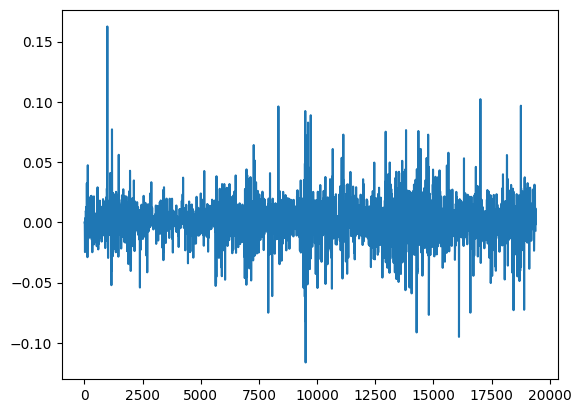

In [18]:
s = data.loc[data["ticker"] == "GOOGL"]
plt.plot(s['returns'])

In [19]:
# Estimate GARCH volatility for each asset
data['garch_vol'] = 0.0  # Initialize column
data

/var/folders/mp/4wh54f210fs0z9blnbg386280000gn/T/ipykernel_94935/4198969712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['garch_vol'] = 0.0  # Initialize column


Price,date,ticker,close,high,low,open,volume,returns,garch_vol
10,2015-01-03,AAPL,24.261042,24.729265,23.821666,24.718169,212818400.0,0.000000,0.0
15,2015-01-04,AAPL,24.261042,24.729265,23.821666,24.718169,212818400.0,0.000000,0.0
20,2015-01-05,AAPL,23.577572,24.110148,23.391171,24.030261,257142000.0,-0.028171,0.0
25,2015-01-06,AAPL,23.579792,23.839422,23.218083,23.641926,263188400.0,0.000094,0.0
30,2015-01-07,AAPL,23.910435,24.010292,23.677432,23.788385,160423600.0,0.014022,0.0
...,...,...,...,...,...,...,...,...,...
19369,2025-08-09,TSLA,329.649994,335.149994,320.980011,321.429993,91200300.0,0.000000,0.0
19374,2025-08-10,TSLA,329.649994,335.149994,320.980011,321.429993,91200300.0,0.000000,0.0
19379,2025-08-11,TSLA,339.029999,346.640015,334.149994,335.000000,105320200.0,0.028454,0.0
19384,2025-08-12,TSLA,340.839996,345.260010,332.940002,345.000000,80522100.0,0.005339,0.0


In [21]:
for tic in tickers:
    tic_returns = data[data['ticker'] == tic]['returns'].dropna()
    if len(tic_returns) > 10:  # Need sufficient data
        try:
            # Use unscaled returns (decimal form) and disable auto-rescaling
            garch = arch_model(tic_returns, vol='Garch', p=1, q=1, dist='Normal', rescale=False)
            garch_fit = garch.fit(disp='off')
            vol = garch_fit.conditional_volatility
            # Assign volatility to matching indices
            data.loc[data['ticker'] == tic, 'garch_vol'] = vol.reindex(data[data['ticker'] == tic].index, fill_value=0)
        except Exception as e:
            print(f"GARCH failed for {tic}: {e}")
            data.loc[data['ticker'] == tic, 'garch_vol'] = 0.0  # Fallback
    else:
        print(f"Insufficient data for GARCH on {tic}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [26]:
data.groupby('ticker')['garch_vol'].mean()

ticker
AAPL       0.014479
BND        0.002475
BTC-USD    0.033195
GOOGL      0.014428
TSLA       0.029211
Name: garch_vol, dtype: float64